### Import libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
toyota = pd.read_csv('ToyotaCorolla.csv',encoding='latin1',index_col=0)
toyota.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [12]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [13]:
corolla = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1438,7500,69,20544,86,1300,3,5,69,1025
1439,10845,72,19000,86,1300,3,5,69,1015
1440,8500,71,17016,86,1300,3,5,69,1015


In [14]:
corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [16]:
## Check null values
toyota.isnull().sum()

Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [17]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()

In [18]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:12:24   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
print('t values :\n',model.tvalues,'\np values :\n',model.pvalues)

t values :
 Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
p values :
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [29]:
model_cc = smf.ols('Price~cc',data=toyota).fit()
model_cc.tvalues,model_cc.pvalues

(Intercept    24.694090
 cc            4.824822
 dtype: float64,
 Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64)

In [28]:
model_doors = smf.ols('Price~Doors',data=toyota).fit()
model_doors.tvalues,model_doors.pvalues

(Intercept    19.258097
 Doors         7.141657
 dtype: float64,
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [32]:
model1 = smf.ols('Price~cc+Doors',data=toyota).fit()
model1.tvalues,model1.pvalues

(Intercept    12.620704
 cc            4.340400
 Doors         6.816153
 dtype: float64,
 Intercept    1.056885e-34
 cc           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

### Calculating VIF Value

In [36]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_geers=smf.ols('Gears~KM+HP+cc+Doors+Age_08_04+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_geers=1/(1-rsq_geers)

rsq_qt=smf.ols('Quarterly_Tax~KM+HP+cc+Doors+Age_08_04+Gears+Weight',data=toyota).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_weight=smf.ols('Weight~KM+HP+cc+Doors+Age_08_04+Quarterly_Tax+Gears',data=toyota).fit().rsquared
vif_weight=1/(1-rsq_weight)

In [39]:
df = pd.DataFrame({'Variables':["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],
                 'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_geers,vif_qt,vif_weight]})
df

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


## Cook's Distance

In [54]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

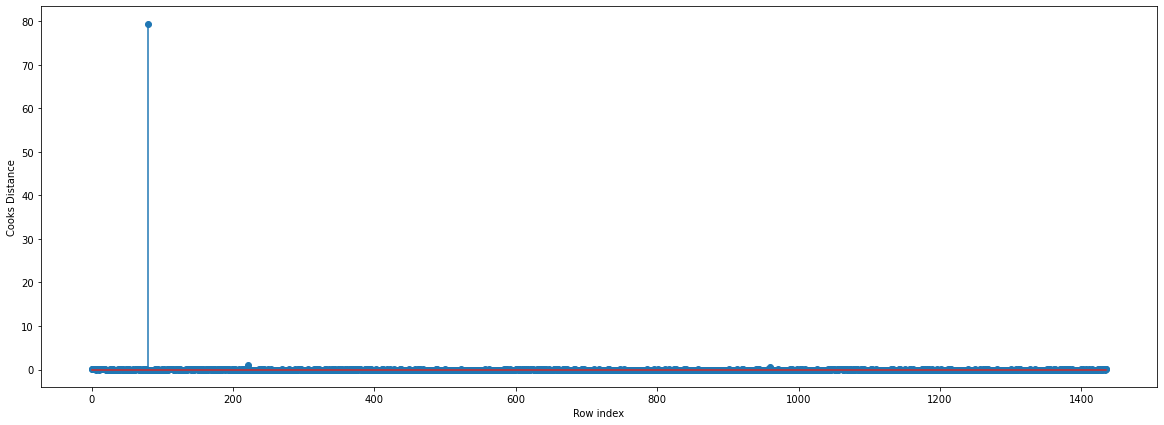

In [58]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [59]:
np.argmax(c),np.max(c)

(80, 79.52010624138055)

In [60]:
toyota.shape

(1436, 37)

In [61]:
k = toyota.shape[1]
n = toyota.shape[0]
levarage_cutoff=3*((k+1)/n)
levarage_cutoff

0.07938718662952646

In [62]:
import statsmodels.api as sm

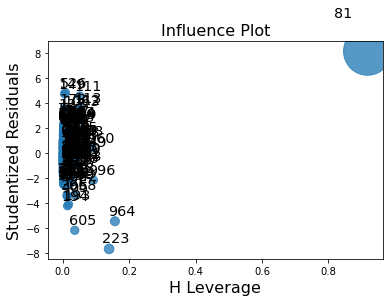

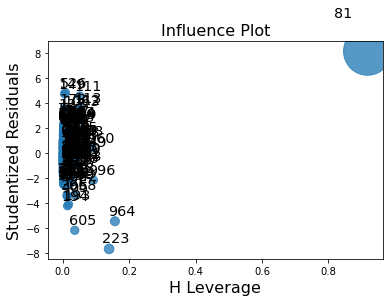

In [63]:
sm.graphics.influence_plot(model)

In [64]:
toyota[toyota.index.isin([81])]

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,8,2002,20019,Petrol,110,1,Blue,...,1,1,1,0,0,0,0,0,0,0


In [67]:
toyota = toyota.drop(toyota.index[[81]],axis=0).reset_index(drop=True)
toyota.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [69]:
final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()

In [70]:
final_model.rsquared

0.8633983077834337

### Predict new data

In [71]:
new_data=pd.DataFrame({"Age_08_04":13,"KM":40000,"HP":70,"cc":1300,"Doors":4,"Gears":4,"Quarterly_Tax":80,"Weight":1200},index=[0])
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13,40000,70,1300,4,4,80,1200


In [72]:
final_model.predict(new_data)

0    17108.969299
dtype: float64